In [77]:
import pandas as pd 
import os
import re
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import numpy as np
from numpy import sign
# 设置绘图风格
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette("Set2")

file_path = '../freqtrade-grid/user_data/data/binance/futures'
time_frame = '1d'

def extract_coin_symbols(directory):
    coin_list = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            coin_list.append(coin_symbol)
    
    return coin_list


if os.path.exists(file_path) and os.path.isdir(file_path):
    coins = extract_coin_symbols(file_path)
# print(coins)
top50 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT"
]

top100 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT"
]

top150 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT"
]

top200 = [
"BTC/USDT:USDT","ETH/USDT:USDT","XRP/USDT:USDT","BNB/USDT:USDT","SOL/USDT:USDT","DOGE/USDT:USDT","TRX/USDT:USDT","ADA/USDT:USDT","SUI/USDT:USDT","HYPE/USDT:USDT","LINK/USDT:USDT","AVAX/USDT:USDT","XLM/USDT:USDT","TON/USDT:USDT","BCH/USDT:USDT","HBAR/USDT:USDT","LTC/USDT:USDT","DOT/USDT:USDT","XMR/USDT:USDT","UNI/USDT:USDT","AAVE/USDT:USDT","TAO/USDT:USDT","NEAR/USDT:USDT","APT/USDT:USDT","ONDO/USDT:USDT","ICP/USDT:USDT","ETC/USDT:USDT","KAS/USDT:USDT","POL/USDT:USDT","TRUMP/USDT:USDT","VET/USDT:USDT","RENDER/USDT:USDT","ENA/USDT:USDT","FET/USDT:USDT","WLD/USDT:USDT","ARB/USDT:USDT","FIL/USDT:USDT","ATOM/USDT:USDT","ALGO/USDT:USDT","JUP/USDT:USDT","TIA/USDT:USDT","VIRTUAL/USDT:USDT","INJ/USDT:USDT","QNT/USDT:USDT","STX/USDT:USDT","S/USDT:USDT","DEXE/USDT:USDT","OP/USDT:USDT","FARTCOIN/USDT:USDT","IP/USDT:USDT","FORM/USDT:USDT","SEI/USDT:USDT","A/USDT:USDT","SPX/USDT:USDT","IMX/USDT:USDT","WIF/USDT:USDT","GRT/USDT:USDT","CRV/USDT:USDT","LDO/USDT:USDT","ZEC/USDT:USDT","ENS/USDT:USDT","JASMY/USDT:USDT","THETA/USDT:USDT","CAKE/USDT:USDT","GALA/USDT:USDT","WAL/USDT:USDT","SAND/USDT:USDT","IOTA/USDT:USDT","PYTH/USDT:USDT","PENGU/USDT:USDT","BSV/USDT:USDT","PENDLE/USDT:USDT","KAIA/USDT:USDT","XTZ/USDT:USDT","RUNE/USDT:USDT","FLOW/USDT:USDT","BRETT/USDT:USDT","ZKJ/USDT:USDT","JTO/USDT:USDT","XCN/USDT:USDT","MANA/USDT:USDT","APE/USDT:USDT","KAITO/USDT:USDT","DEEP/USDT:USDT","ATH/USDT:USDT","GRASS/USDT:USDT","EIGEN/USDT:USDT","EGLD/USDT:USDT","DYDX/USDT:USDT","AR/USDT:USDT","AERO/USDT:USDT","STRK/USDT:USDT","KAVA/USDT:USDT","NEO/USDT:USDT","AXS/USDT:USDT","RSR/USDT:USDT","SUPER/USDT:USDT","LPT/USDT:USDT","ETHFI/USDT:USDT","W/USDT:USDT","CFX/USDT:USDT","SYRUP/USDT:USDT","CHZ/USDT:USDT","MOVE/USDT:USDT","POPCAT/USDT:USDT","MORPHO/USDT:USDT","COMP/USDT:USDT","SAFE/USDT:USDT","SUN/USDT:USDT","TWT/USDT:USDT","JST/USDT:USDT","AKT/USDT:USDT","OM/USDT:USDT","AXL/USDT:USDT","TURBO/USDT:USDT","BERA/USDT:USDT","1INCH/USDT:USDT","MEW/USDT:USDT","MINA/USDT:USDT","KSM/USDT:USDT","AI16Z/USDT:USDT","DASH/USDT:USDT","PNUT/USDT:USDT","ZRO/USDT:USDT","NXPC/USDT:USDT","SFP/USDT:USDT","NOT/USDT:USDT","SNX/USDT:USDT","GLM/USDT:USDT","ROSE/USDT:USDT","ZIL/USDT:USDT","MOCA/USDT:USDT","MASK/USDT:USDT","BLUR/USDT:USDT","QTUM/USDT:USDT","CKB/USDT:USDT","MOODENG/USDT:USDT","ASTR/USDT:USDT","ZK/USDT:USDT","ZRX/USDT:USDT","GAS/USDT:USDT","ORDI/USDT:USDT","BAT/USDT:USDT","VANA/USDT:USDT","ACH/USDT:USDT"
]

import random
random200 = random.sample(coins, 200)

target_coins = top200


def extract_coin_data(directory):
    coins = []
    symbols = []
    pattern = re.compile(r'(.+?)_USDT-1d-futures\.feather$')

    for filename in os.listdir(directory):
        match = pattern.match(filename)
        if match:
            coin_symbol = (match.group(1)+':USDT').replace('_','/')
            if coin_symbol in target_coins: 
                df = pd.read_feather(f'{directory}/{filename}')
                df = df.reset_index(drop=True)
                df['symbol'] = coin_symbol
                if len(df) > 0 :
                    coins.append(df)
                    symbols.append(coin_symbol)
    
    return coins,symbols

if os.path.exists(file_path) and os.path.isdir(file_path):
    coins,symbols = extract_coin_data(file_path)

data = pd.concat(coins)
data = data[data['date'] > '2023-01-01']
data['date'] = pd.to_datetime(data['date'])
data.sort_values(['symbol', 'date'], inplace=True)
data

,date,open,high,low,close,volume,symbol
1,2023-01-02 00:00:00+00:00,0.3856,0.3996,0.3783,0.3958,39036763.0,1INCH/USDT:USDT
2,2023-01-03 00:00:00+00:00,0.3959,0.3999,0.3817,0.3860,32904073.0,1INCH/USDT:USDT
3,2023-01-04 00:00:00+00:00,0.3861,0.4029,0.3839,0.3954,42282126.0,1INCH/USDT:USDT
4,2023-01-05 00:00:00+00:00,0.3954,0.4019,0.3867,0.3885,42126148.0,1INCH/USDT:USDT
5,2023-01-06 00:00:00+00:00,0.3884,0.3979,0.3801,0.3963,53499746.0,1INCH/USDT:USDT
...,...,...,...,...,...,...,...
887,2025-06-06 00:00:00+00:00,0.2268,0.2395,0.2256,0.2323,36327061.6,ZRX/USDT:USDT
888,2025-06-07 00:00:00+00:00,0.2324,0.2423,0.2319,0.2390,20262308.4,ZRX/USDT:USDT
889,2025-06-08 00:00:00+00:00,0.2390,0.2430,0.2352,0.2394,20466700.3,ZRX/USDT:USDT
890,2025-06-09 00:00:00+00:00,0.2395,0.2530,0.2326,0.2520,27880456.3,ZRX/USDT:USDT


In [88]:
def sma(group, window=20):
    return group['close'].rolling(window).mean()

def correlation(group, window=12):
    return group['adv20'].rolling(window).corr(group['low']).fillna(0).replace([np.inf, -np.inf], 0)

def decay_linear(s, window):
    weights = np.array(range(1, window+1))
    sum_weights = np.sum(weights)
    return s.rolling(window).apply(lambda x: np.sum(weights*x) / sum_weights)

def scale(group, k=1):
    return group.mul(k).div(np.abs(group).sum())

def zscore(group):
    return (group - group.mean()) / group.std()


#p1
data['delta_close_10'] = data.groupby('symbol')['close'].diff(10)
data['rank_delta_close_10'] = data.groupby('date')['delta_close_10'].rank(method='min', pct=True)
data['rank_rank_delta_close_10'] = data.groupby('date')['rank_delta_close_10'].rank(method='min', pct=True)
data['neg_rank_rank_delta'] = -1 * data['rank_rank_delta_close_10']
data['decay_linear_neg'] = data.groupby('symbol')['neg_rank_rank_delta'].transform(lambda x: decay_linear(x, 10))
data['rank_decay'] = data.groupby('date')['decay_linear_neg'].rank(method='min', pct=True)
data['rank_rank_decay'] = data.groupby('date')['rank_decay'].rank(method='min', pct=True)
data['p1'] = data.groupby('date')['rank_rank_decay'].rank(method='min', pct=True)  

#p2
data['delta_close_3'] = data.groupby('symbol')['close'].diff(3)
data['neg_delta_close_3'] = -1 * data['delta_close_3']
data['p2'] = data.groupby('date')['neg_delta_close_3'].rank()  

# p3
data['adv20'] = data.groupby('symbol').apply(sma).reset_index(level=0, drop=True)
data['corr_adv20_low_12'] = data.groupby('symbol').apply(correlation).reset_index(level=0, drop=True)
data['corr_adv20_low_12'] = data['corr_adv20_low_12'].replace([-np.inf, np.inf], 0).fillna(0)
data['scaled_corr'] = data.groupby('date')['corr_adv20_low_12'].transform(scale)
data['p3'] = np.sign(data['scaled_corr'])

In [89]:
data[data['date'] == '2025-05-01 00:00:00+00:00']['scaled_corr'].sum()

0.8277540445407707

In [90]:
data[data['symbol'] == 'BTC/USDT:USDT']

,date,open,high,low,close,volume,symbol,delta_close_10,rank_delta_close_10,rank_rank_delta_close_10,...,rank_decay,rank_rank_decay,p1,delta_close_3,neg_delta_close_3,p2,adv20,corr_adv20_low_12,scaled_corr,p3
1,2023-01-02 00:00:00+00:00,16610.4,16799.0,16541.2,16666.0,215161.176,BTC/USDT:USDT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,2023-01-03 00:00:00+00:00,16665.9,16774.0,16600.3,16667.2,203070.205,BTC/USDT:USDT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
3,2023-01-04 00:00:00+00:00,16667.3,16984.6,16645.7,16842.1,349747.838,BTC/USDT:USDT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
4,2023-01-05 00:00:00+00:00,16842.2,16872.8,16740.4,16823.8,176369.347,BTC/USDT:USDT,NaN,NaN,NaN,...,NaN,NaN,NaN,157.8,-157.8,1.0,NaN,0.000000,NaN,NaN
5,2023-01-06 00:00:00+00:00,16823.8,17030.0,16664.8,16943.8,316973.629,BTC/USDT:USDT,NaN,NaN,NaN,...,NaN,NaN,NaN,276.6,-276.6,1.0,NaN,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2025-06-06 00:00:00+00:00,101458.7,105283.0,101003.4,104240.0,174300.906,BTC/USDT:USDT,-4649.3,0.007194,0.007194,...,0.978417,0.978417,0.978417,-1090.1,1090.1,139.0,106551.985,-0.777833,-0.008297,-1.0
888,2025-06-07 00:00:00+00:00,104240.1,105878.3,103800.1,105507.5,79833.173,BTC/USDT:USDT,-2215.6,0.007194,0.007194,...,1.000000,1.000000,1.000000,865.7,-865.7,1.0,106506.980,-0.663312,-0.007335,-1.0
889,2025-06-08 00:00:00+00:00,105507.5,106482.6,104927.4,105676.5,75105.104,BTC/USDT:USDT,136.6,1.000000,1.000000,...,0.870504,0.870504,0.870504,4217.9,-4217.9,1.0,106514.225,-0.407293,-0.005085,-1.0
890,2025-06-09 00:00:00+00:00,105676.5,110653.6,105253.2,110227.9,192956.409,BTC/USDT:USDT,6277.9,1.000000,1.000000,...,0.769784,0.769784,0.769784,5987.9,-5987.9,1.0,106685.615,0.034967,0.000536,1.0


In [92]:
# """数据预处理：计算收益率和特征"""
print("Preprocessing data...")
# 计算下一日收益率
data['next_day_return'] = data.groupby('symbol')['close'].shift(-1).div(data['close']) - 1
data['to_day_return'] = data.groupby('symbol')['close'].pct_change()

data['amount'] = data['close']*data['volume']


# 计算波动率
data['volatility'] = data.groupby('symbol')['to_day_return'].transform(lambda x: x.rolling(window=10, min_periods=5).std())

# 计算动量 过去10的动量，不计算当期动量
data['momentum'] = data.groupby('symbol')['to_day_return'].transform(lambda x: x.rolling(window=10, min_periods=5).apply(lambda y: (1+y).prod()-1))

# 计算成交额
data['amount'] = data.groupby('symbol')['amount'].transform(lambda x: x.rolling(window=10, min_periods=5).mean())


# 计算mf
data['factor'] = data['p1'] + data['p2'] + data['p3']


# 对每个因子按日期横截面标准化
data['volatility_z'] = data.groupby('date')['volatility'].transform(zscore)
data['momentum_z'] = data.groupby('date')['momentum'].transform(zscore)
data['amount_z'] = data.groupby('date')['amount'].transform(zscore)
data['factor_z'] = data.groupby('date')['factor'].transform(zscore)

# 计算市场收益率 (所有币种等权重平均)
market_return = data.groupby('date')['to_day_return'].mean().reset_index()
market_return.columns = ['date', 'market_return']
data = pd.merge(data, market_return, on='date')
data = data.dropna()
data

Preprocessing data...


,date,open,high,low,close,volume,symbol,delta_close_10,rank_delta_close_10,rank_rank_delta_close_10,...,to_day_return,amount,volatility,momentum,factor,volatility_z,momentum_z,amount_z,factor_z,market_return
30,2023-02-01 00:00:00+00:00,0.5141,0.5301,0.4931,0.5282,66674108.0,1INCH/USDT:USDT,0.0149,0.373134,0.373134,...,0.027626,3.692198e+07,0.035548,0.029028,43.560606,-0.699170,-0.398008,-0.272494,0.437446,0.055386
31,2023-02-02 00:00:00+00:00,0.5281,0.5766,0.5272,0.5415,88005432.0,1INCH/USDT:USDT,0.0061,0.492537,0.492537,...,0.025180,3.549930e+07,0.033738,0.011393,43.530303,-0.748986,-0.340133,-0.271323,0.446277,-0.010636
32,2023-02-03 00:00:00+00:00,0.5412,0.5758,0.5351,0.5668,71751085.0,1INCH/USDT:USDT,0.0542,0.358209,0.358209,...,0.046722,3.602167e+07,0.032525,0.105735,44.575758,-0.665303,-0.312873,-0.271915,0.484683,0.033964
33,2023-02-04 00:00:00+00:00,0.5668,0.6047,0.5526,0.5817,98743861.0,1INCH/USDT:USDT,0.0472,0.462687,0.462687,...,0.026288,3.413711e+07,0.031105,0.088307,20.560606,-0.746641,-0.063027,-0.275213,-0.766415,-0.002734
34,2023-02-05 00:00:00+00:00,0.5818,0.6204,0.5272,0.5602,161230858.0,1INCH/USDT:USDT,0.0327,0.582090,0.582090,...,-0.036961,3.963335e+07,0.033784,0.061991,17.507463,-0.662362,-0.047946,-0.271122,-0.918595,-0.019801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88348,2025-06-05 00:00:00+00:00,0.2388,0.2450,0.2228,0.2267,46314710.3,ZRX/USDT:USDT,-0.0331,0.705036,0.705036,...,-0.050272,1.032266e+07,0.035159,-0.127406,41.381295,-0.460102,0.210266,-0.175040,-0.738992,-0.063089
88349,2025-06-06 00:00:00+00:00,0.2268,0.2395,0.2256,0.2323,36327061.6,ZRX/USDT:USDT,-0.0312,0.712230,0.712230,...,0.024702,1.037969e+07,0.036198,-0.118406,45.323741,-0.453480,0.363560,-0.176231,-0.641767,0.024650
88350,2025-06-07 00:00:00+00:00,0.2324,0.2423,0.2319,0.2390,20262308.4,ZRX/USDT:USDT,-0.0203,0.748201,0.748201,...,0.028842,9.875309e+06,0.038351,-0.078288,57.309353,-0.461824,0.502108,-0.177177,-0.345613,0.034527
88351,2025-06-08 00:00:00+00:00,0.2390,0.2430,0.2352,0.2394,20466700.3,ZRX/USDT:USDT,-0.0116,0.712230,0.712230,...,0.001674,9.398017e+06,0.037422,-0.046215,91.280576,-0.461661,0.568449,-0.180372,0.497756,-0.006031


In [96]:
print("Calculating factors return...")

# 市场因子 (Market Factor)
market_factor = data.groupby('date')['next_day_return'].mean().reset_index()
market_factor.columns = ['date', 'MKT']
        
# 规模因子 (Size Factor)
# 每天根据规模(交易量)将币种分成大小两组，计算小规模组和大规模组的平均收益率之差
size_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating size factor"):
    if len(group) < 10:  # 至少需要10个币种才能计算
        continue
    group = group.sort_values('amount_z')
    loser = group.iloc[-len(group)//3:]  # 大size
    winner = group.iloc[:len(group)//3]    # 小size
    smb = winner['next_day_return'].mean() - loser['next_day_return'].mean()    
    size_factor.append({'date': date, 'SMB': smb})
size_factor = pd.DataFrame(size_factor)
        
# 动量因子 (Momentum Factor)
mom_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating momentum factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('momentum_z')
    winner = group.iloc[-len(group)//3:]  # 大mom
    loser = group.iloc[:len(group)//3]    # 小mom
    mom = winner['next_day_return'].mean() - loser['next_day_return'].mean()
    mom_factor.append({'date': date, 'MOM': mom})
mom_factor = pd.DataFrame(mom_factor)

# 波动率因子 (Volatility Factor)
vol_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating volatility factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('volatility_z')
    low_vol = group.iloc[:len(group)//3]   # 低波动率组
    high_vol = group.iloc[-len(group)//3:]  # 高波动率组
    vol = high_vol['next_day_return'].mean() - low_vol['next_day_return'].mean()
    vol_factor.append({'date': date, 'VOL': vol})
vol_factor = pd.DataFrame(vol_factor)


# a31
general_factor = []
for date, group in tqdm(data.groupby('date'), desc="Calculating general factor"):
    if len(group) < 10:
        continue
    group = group.sort_values('factor_z')
    low_gen = group.iloc[:len(group)//3]   
    high_gen = group.iloc[-len(group)//3:]  
    gen = high_gen['next_day_return'].mean() - low_gen['next_day_return'].mean()
    general_factor.append({'date': date, 'GEN': gen})
general_factor = pd.DataFrame(general_factor)



factors = market_factor.merge(size_factor, on='date', how='left')
factors = factors.merge(mom_factor, on='date', how='left')
factors = factors.merge(vol_factor, on='date', how='left')
factors = factors.merge(general_factor, on='date', how='left')
factors['const'] = 1


# 因子收益率累计
factors['MKT_Cumulative'] = (1 + factors['MKT']).cumprod() - 1
factors['SMB_Cumulative'] = (1 + factors['SMB']).cumprod() - 1
factors['MOM_Cumulative'] = (1 + factors['MOM']).cumprod() - 1
factors['VOL_Cumulative'] = (1 + factors['VOL']).cumprod() - 1
factors['GEN_Cumulative'] = (1 + factors['GEN']).cumprod() - 1


factors.set_index('date', inplace=True)
factors.dropna(inplace=True)
        
# # 标准化因子
# scaler = StandardScaler()
# factors[['MKT', 'SMB', 'MOM', 'VOL']] = scaler.fit_transform(factors[['MKT', 'SMB', 'MOM', 'VOL']])
factors


Calculating factors return...


Calculating general factor: 100%|██████████| 860/860 [00:00<00:00, 1372.14it/s]


,MKT,SMB,MOM,VOL,GEN,const,MKT_Cumulative,SMB_Cumulative,MOM_Cumulative,VOL_Cumulative,GEN_Cumulative
date,,,,,,,,,,,
2023-02-01 00:00:00+00:00,-0.010058,0.011164,-0.019374,-0.023457,0.007551,1,-0.010058,0.011164,-0.019374,-0.023457,0.007551
2023-02-02 00:00:00+00:00,0.031439,0.016886,-0.002078,0.017963,0.007991,1,0.021064,0.028238,-0.021412,-0.005916,0.015602
2023-02-03 00:00:00+00:00,-0.002853,0.007594,-0.003872,-0.011270,0.015669,1,0.018151,0.036046,-0.025201,-0.017119,0.031516
2023-02-04 00:00:00+00:00,-0.025464,0.025967,0.011716,-0.008357,-0.005652,1,-0.007775,0.062950,-0.013781,-0.025334,0.025686
2023-02-05 00:00:00+00:00,-0.017103,0.012585,-0.007827,-0.002856,-0.000594,1,-0.024744,0.076327,-0.021500,-0.028118,0.025077
...,...,...,...,...,...,...,...,...,...,...,...
2025-06-05 00:00:00+00:00,0.024650,0.009790,-0.012461,-0.008860,0.002217,1,0.182173,0.428133,0.073968,0.810377,0.521017
2025-06-06 00:00:00+00:00,0.034527,-0.009954,-0.025100,0.018967,0.005291,1,0.222989,0.413917,0.047012,0.844714,0.529065
2025-06-07 00:00:00+00:00,-0.006031,-0.005864,0.008352,-0.006237,-0.000712,1,0.215614,0.405625,0.055757,0.833209,0.527976


In [97]:
print("Performing single factor tests...")    
# 计算每个因子的描述性统计
factor_stats = factors[['SMB', 'MOM', 'VOL', 'GEN']].describe().T
factor_stats['t-stat'] = factor_stats['mean'] / (factor_stats['std'] / np.sqrt(factor_stats['count']))
factor_stats

Performing single factor tests...


,count,mean,std,min,25%,50%,75%,max,t-stat
SMB,860.0,0.000475,0.013723,-0.046053,-0.006701,0.000450,0.007503,0.121310,1.014385
MOM,860.0,0.000196,0.016191,-0.065738,-0.008020,-0.000115,0.008587,0.056347,0.355194
VOL,860.0,0.000937,0.019627,-0.071510,-0.010875,-0.000166,0.012208,0.089233,1.399840
GEN,860.0,0.000564,0.012260,-0.054920,-0.006330,0.000081,0.006939,0.091424,1.350206


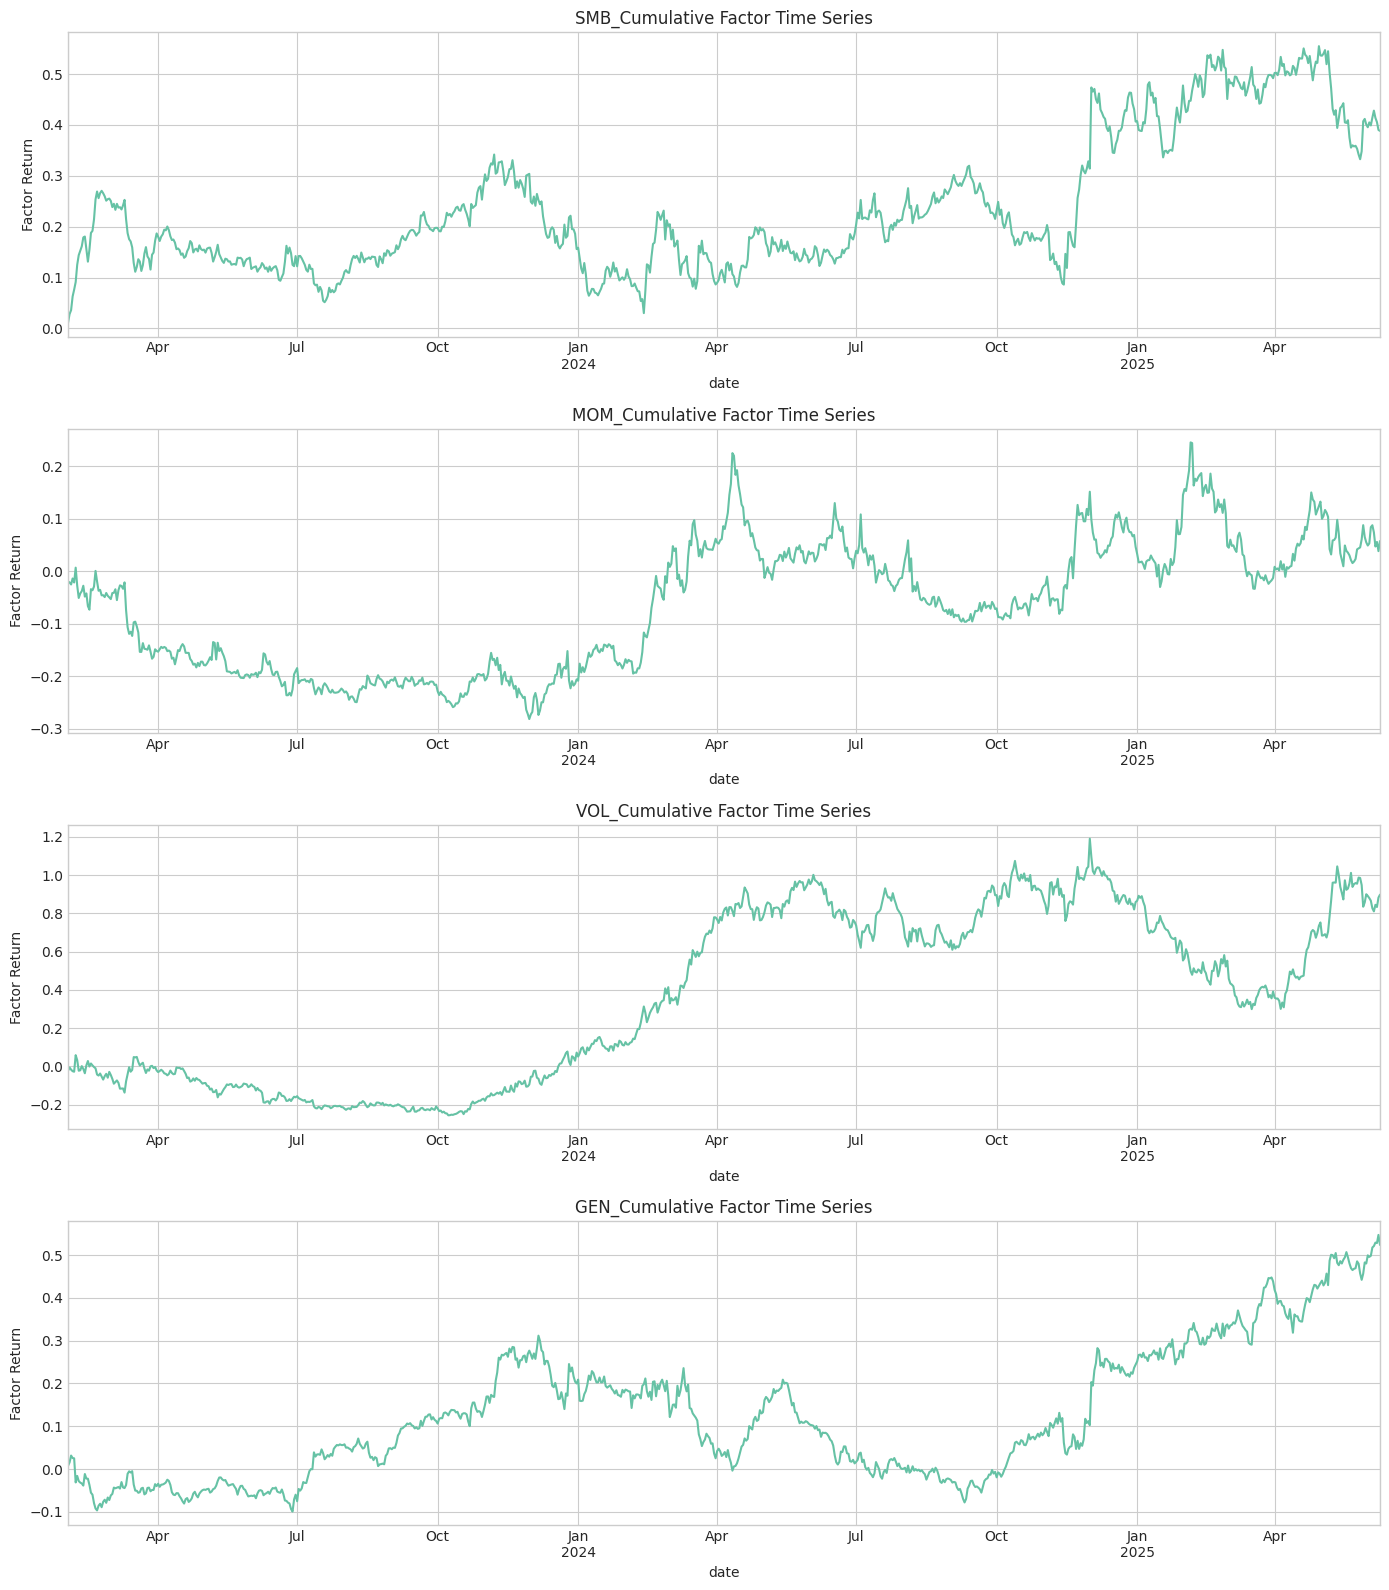

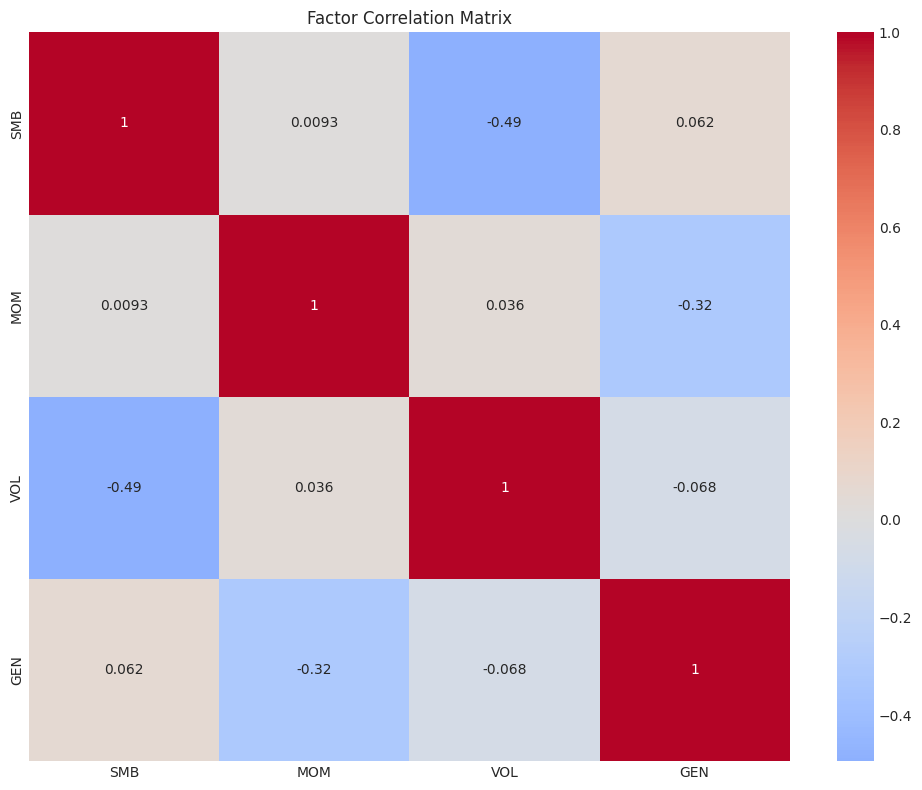

In [99]:
# 绘制因子时间序列
fig, axes = plt.subplots(4, 1, figsize=(14, 16))
for i, factor in enumerate(['SMB_Cumulative', 'MOM_Cumulative', 'VOL_Cumulative','GEN_Cumulative']):
    factors[factor].plot(ax=axes[i], title=f'{factor} Factor Time Series')
    axes[i].set_ylabel('Factor Return')
plt.tight_layout()
plt.savefig('factor_time_series.png', dpi=300)

# # 绘制因子相关性热力图
plt.figure(figsize=(10, 8))
sns.heatmap(factors[['SMB', 'MOM', 'VOL', 'GEN']].corr(), 
            annot=True, cmap='coolwarm', center=0)
plt.title('Factor Correlation Matrix')
plt.tight_layout()
plt.savefig('factor_correlation.png', dpi=300)

In [101]:
print("Building factor portfolios...")
n_portfolios = 10

data = data.copy()
data = data[data['date'].isin(factors.index)]

portfolio_dfs = []

for factor in ['amount', 'momentum', 'volatility', 'factor']:
    portfolio_returns = []
    
    for date, group in tqdm(data.groupby('date'), desc=f"Processing {factor} portfolios"):
        if len(group) < n_portfolios * 3:  # 确保有足够样本
            continue
        # 按因子值分组
        group = group.sort_values(factor)
        group['portfolio'] = pd.qcut(group[factor], n_portfolios, labels=False)
        
        # 计算每个组合的等权重收益率
        port_ret = group.groupby('portfolio')['next_day_return'].mean().reset_index()
        port_ret['date'] = date
        portfolio_returns.append(port_ret)
    
    portfolio_returns = pd.concat(portfolio_returns)
    portfolio_returns['factor'] = factor
    portfolio_dfs.append(portfolio_returns)

portfolio_returns = pd.concat(portfolio_dfs)

# 计算投资组合表现统计
portfolio_stats = []
for factor in ['amount', 'momentum', 'volatility','factor']:
    for portfolio in range(n_portfolios):
        port_ret = portfolio_returns[
            (portfolio_returns['factor'] == factor) & 
            (portfolio_returns['portfolio'] == portfolio)]['next_day_return']
        
        stats = {
            'factor': factor,
            'portfolio': portfolio,
            'mean_return': port_ret.mean(),
            'std_dev': port_ret.std(),
            'sharpe': port_ret.mean() / port_ret.std() * np.sqrt(252),
            'skewness': port_ret.skew(),
            'kurtosis': port_ret.kurtosis(),
            'min': port_ret.min(),
            'max': port_ret.max()
        }
        portfolio_stats.append(stats)

portfolio_stats = pd.DataFrame(portfolio_stats)
portfolio_stats

Building factor portfolios...


Processing factor portfolios: 100%|██████████| 860/860 [00:02<00:00, 359.87it/s]


,factor,portfolio,mean_return,std_dev,sharpe,skewness,kurtosis,min,max
0,amount,0,0.001789,0.036962,0.768274,0.189469,4.760133,-0.168213,0.276330
1,amount,1,0.001037,0.038632,0.426047,-0.340106,1.694373,-0.181746,0.135636
2,amount,2,0.000934,0.039111,0.379237,-0.314591,1.473046,-0.177261,0.136729
3,amount,3,0.000708,0.039972,0.281240,-0.229083,1.521615,-0.185536,0.149786
4,amount,4,0.001286,0.042164,0.484329,-0.115921,2.111314,-0.184578,0.210577
5,amount,5,0.001630,0.042830,0.604200,-0.031894,2.256448,-0.165797,0.214536
6,amount,6,0.001714,0.043076,0.631521,-0.000457,1.435381,-0.166966,0.169051
7,amount,7,0.000554,0.042087,0.208861,-0.002880,1.631981,-0.160667,0.159730
8,amount,8,-0.000140,0.041569,-0.053357,-0.041190,1.705329,-0.185760,0.155577
9,amount,9,0.001392,0.039589,0.558026,0.250587,1.948963,-0.172387,0.193590


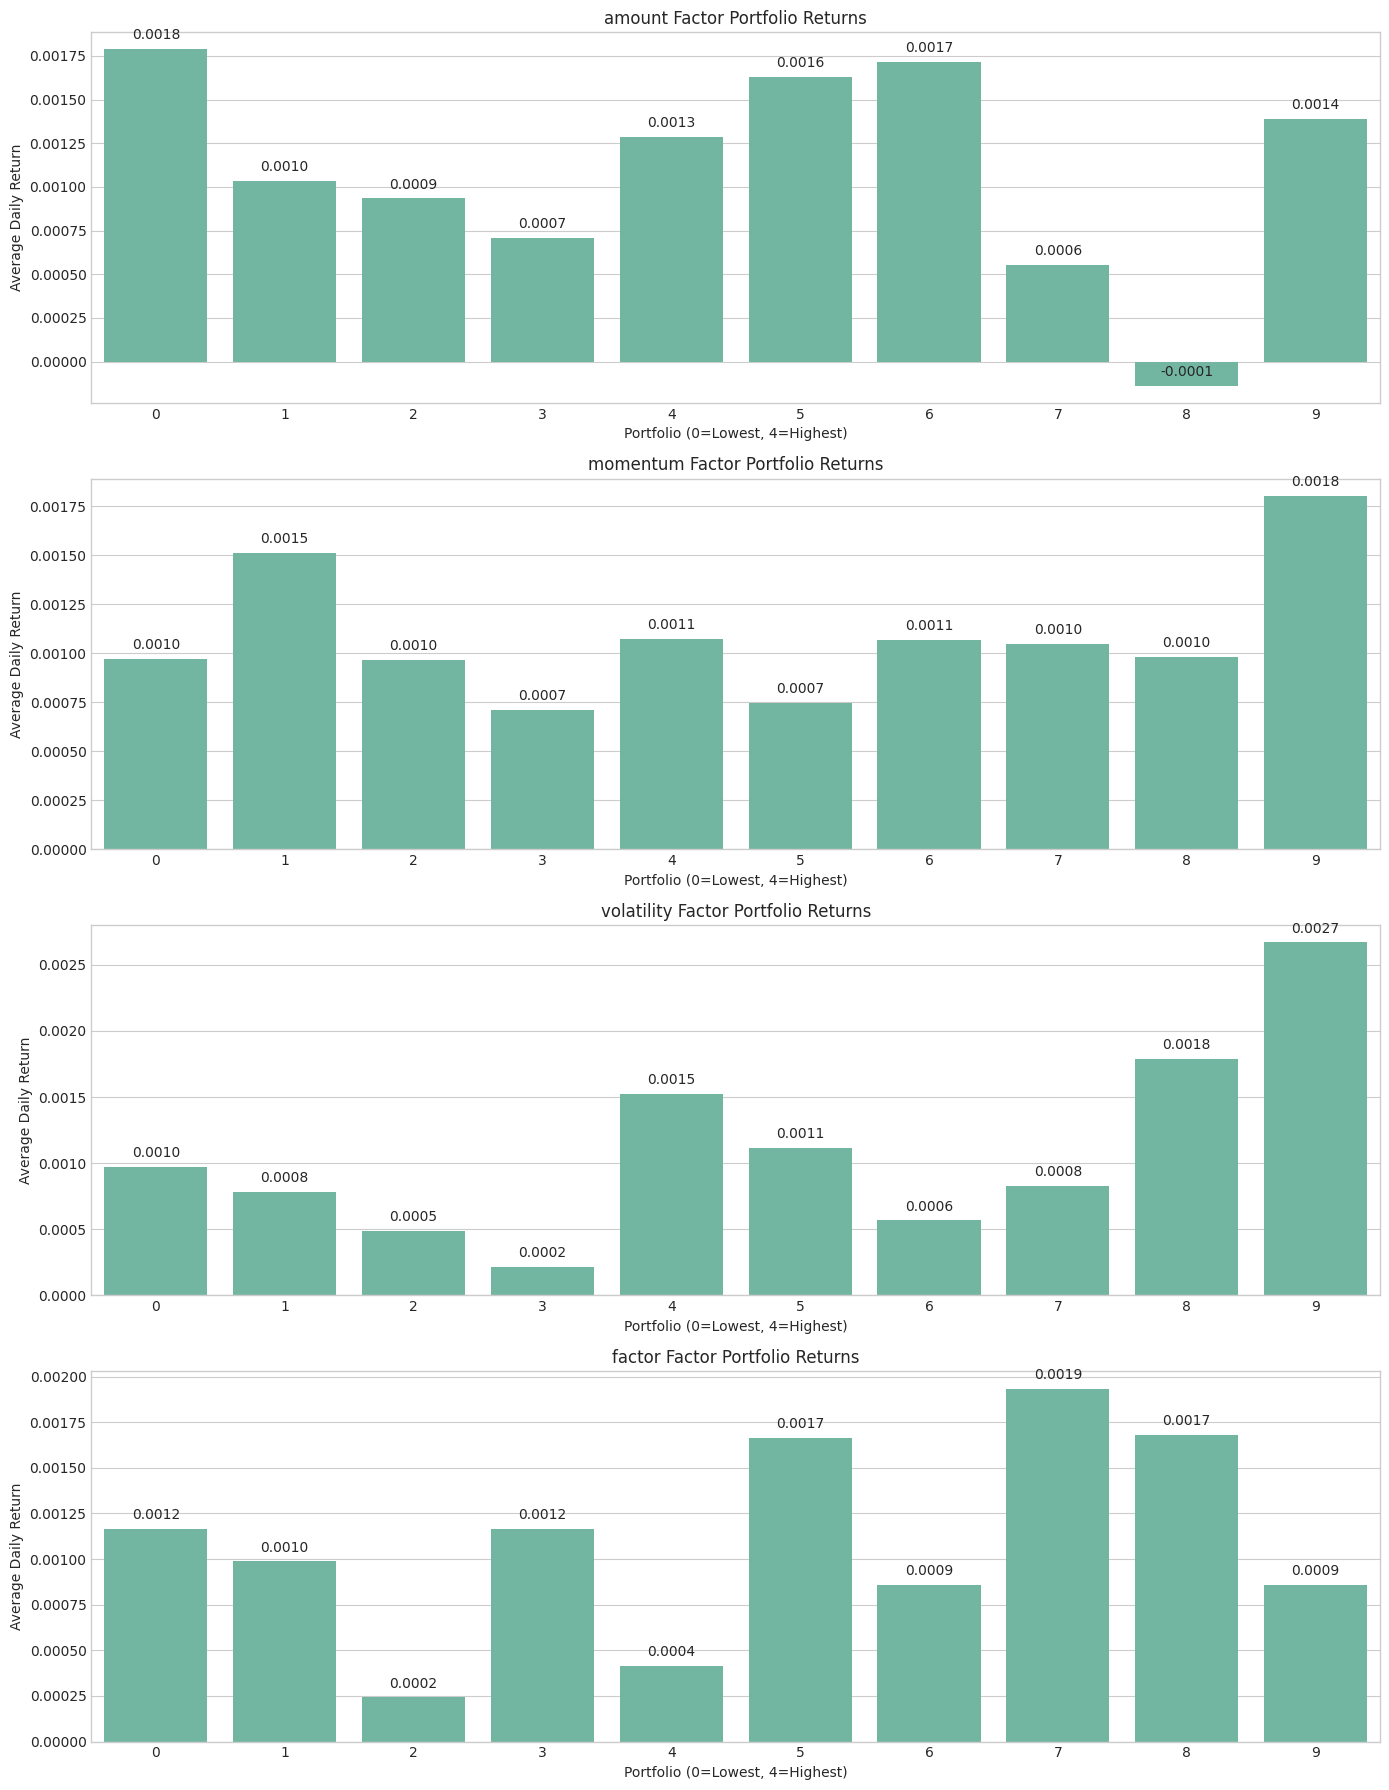

In [104]:
fig, axes = plt.subplots(4, 1, figsize=(14, 18))

for i, factor in enumerate(['amount', 'momentum', 'volatility','factor']):
    factor_name = factor
    
    # 提取该因子的投资组合数据
    factor_data = portfolio_stats[portfolio_stats['factor'] == factor]
    
    # 绘制平均收益率
    ax = axes[i]
    sns.barplot(x='portfolio', y='mean_return', data=factor_data, ax=ax)
    ax.set_title(f'{factor_name} Factor Portfolio Returns')
    ax.set_xlabel('Portfolio (0=Lowest, 4=Highest)')
    ax.set_ylabel('Average Daily Return')
    
    # 添加数值标签
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}", 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), 
                    textcoords='offset points')

plt.tight_layout()
plt.savefig('portfolio_performance.png', dpi=300)

In [105]:
data

,date,open,high,low,close,volume,symbol,delta_close_10,rank_delta_close_10,rank_rank_delta_close_10,...,to_day_return,amount,volatility,momentum,factor,volatility_z,momentum_z,amount_z,factor_z,market_return
30,2023-02-01 00:00:00+00:00,0.5141,0.5301,0.4931,0.5282,66674108.0,1INCH/USDT:USDT,0.0149,0.373134,0.373134,...,0.027626,3.692198e+07,0.035548,0.029028,43.560606,-0.699170,-0.398008,-0.272494,0.437446,0.055386
31,2023-02-02 00:00:00+00:00,0.5281,0.5766,0.5272,0.5415,88005432.0,1INCH/USDT:USDT,0.0061,0.492537,0.492537,...,0.025180,3.549930e+07,0.033738,0.011393,43.530303,-0.748986,-0.340133,-0.271323,0.446277,-0.010636
32,2023-02-03 00:00:00+00:00,0.5412,0.5758,0.5351,0.5668,71751085.0,1INCH/USDT:USDT,0.0542,0.358209,0.358209,...,0.046722,3.602167e+07,0.032525,0.105735,44.575758,-0.665303,-0.312873,-0.271915,0.484683,0.033964
33,2023-02-04 00:00:00+00:00,0.5668,0.6047,0.5526,0.5817,98743861.0,1INCH/USDT:USDT,0.0472,0.462687,0.462687,...,0.026288,3.413711e+07,0.031105,0.088307,20.560606,-0.746641,-0.063027,-0.275213,-0.766415,-0.002734
34,2023-02-05 00:00:00+00:00,0.5818,0.6204,0.5272,0.5602,161230858.0,1INCH/USDT:USDT,0.0327,0.582090,0.582090,...,-0.036961,3.963335e+07,0.033784,0.061991,17.507463,-0.662362,-0.047946,-0.271122,-0.918595,-0.019801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88348,2025-06-05 00:00:00+00:00,0.2388,0.2450,0.2228,0.2267,46314710.3,ZRX/USDT:USDT,-0.0331,0.705036,0.705036,...,-0.050272,1.032266e+07,0.035159,-0.127406,41.381295,-0.460102,0.210266,-0.175040,-0.738992,-0.063089
88349,2025-06-06 00:00:00+00:00,0.2268,0.2395,0.2256,0.2323,36327061.6,ZRX/USDT:USDT,-0.0312,0.712230,0.712230,...,0.024702,1.037969e+07,0.036198,-0.118406,45.323741,-0.453480,0.363560,-0.176231,-0.641767,0.024650
88350,2025-06-07 00:00:00+00:00,0.2324,0.2423,0.2319,0.2390,20262308.4,ZRX/USDT:USDT,-0.0203,0.748201,0.748201,...,0.028842,9.875309e+06,0.038351,-0.078288,57.309353,-0.461824,0.502108,-0.177177,-0.345613,0.034527
88351,2025-06-08 00:00:00+00:00,0.2390,0.2430,0.2352,0.2394,20466700.3,ZRX/USDT:USDT,-0.0116,0.712230,0.712230,...,0.001674,9.398017e+06,0.037422,-0.046215,91.280576,-0.461661,0.568449,-0.180372,0.497756,-0.006031


In [114]:
print("Running multifactor regression...")

# 准备数据
data = data.copy()
def cross_sectional_regression(df,factor):
    """对单个时间点的横截面数据运行线性回归"""
    X = df[factor]  # 自变量（因子值）
    y = df['next_day_return']  # 因变量（下一期收益）
    X = sm.add_constant(X)  # 添加截距项
    model = sm.OLS(y, X).fit()
    return model.params[factor],model.params['const'],model.rsquared,model.tvalues[factor],model.tvalues['const']  # 返回因子收益系数



factor_premium = data.groupby('date').apply(cross_sectional_regression,'factor')

# 转换为DataFrame
factor_premium_df = pd.DataFrame(
    factor_premium.tolist(),
    index=factor_premium.index,
    columns=['lamda', 'alpha', 'rsquared', 't_lamda', 't_alpha']
)

# 可选：重置索引将date变为列
factor_premium_df = factor_premium_df.reset_index()
factor_premium_df
    

Running multifactor regression...


,date,lamda,alpha,rsquared,t_lamda,t_alpha
0,2023-02-01 00:00:00+00:00,0.000209,-0.017382,0.020283,1.151085,-2.390088
1,2023-02-02 00:00:00+00:00,0.000085,0.028466,0.004011,0.507686,4.244518
2,2023-02-03 00:00:00+00:00,0.000253,-0.011715,0.031583,1.444729,-1.665827
3,2023-02-04 00:00:00+00:00,-0.000012,-0.025030,0.000020,-0.035592,-1.802875
4,2023-02-05 00:00:00+00:00,-0.000068,-0.014697,0.002493,-0.403049,-2.162655
...,...,...,...,...,...,...
855,2025-06-05 00:00:00+00:00,0.000037,0.022035,0.001025,0.374943,2.750569
856,2025-06-06 00:00:00+00:00,0.000049,0.031027,0.006770,0.966357,7.460760
857,2025-06-07 00:00:00+00:00,-0.000011,-0.005216,0.000503,-0.262495,-1.462361
858,2025-06-08 00:00:00+00:00,0.000071,0.056795,0.004504,0.787317,7.743423


In [ ]:
# 参数名	    经济含义	        统计解释
# alpha	    截距项（超额收益）	当所有因子为0时的预期收益
# beta_mkt	市场风险暴露（如大盘涨跌敏感性）	每单位市场因子变动带来的收益变化
# beta_pri	价值因子暴露（如BP比率）	价值股相对成长股的收益溢价
# beta_smb	账面市值比因子暴露	高B/M股票的特有风险补偿
# beta_mom	动量因子暴露	过去赢家组合的持续收益能力
# beta_vol	波动率因子暴露	高波动股票的额外风险补偿


# 参数名	     判断标准	
# r_squared	 0-1之间，越接近1越好	模型解释力（如0.3表示因子解释30%收益波动）
# t_alpha	 |t|>2为显著	是否存在超额收益（alpha≠0）
# t_mkt	     |t|>2为显著	市场因子是否有效
# t_pri	     |t|>2为显著	价值因子是否有效
# nobs	     样本量越大越可靠	回归自由度（一般需>30）


Analyzing regression results...


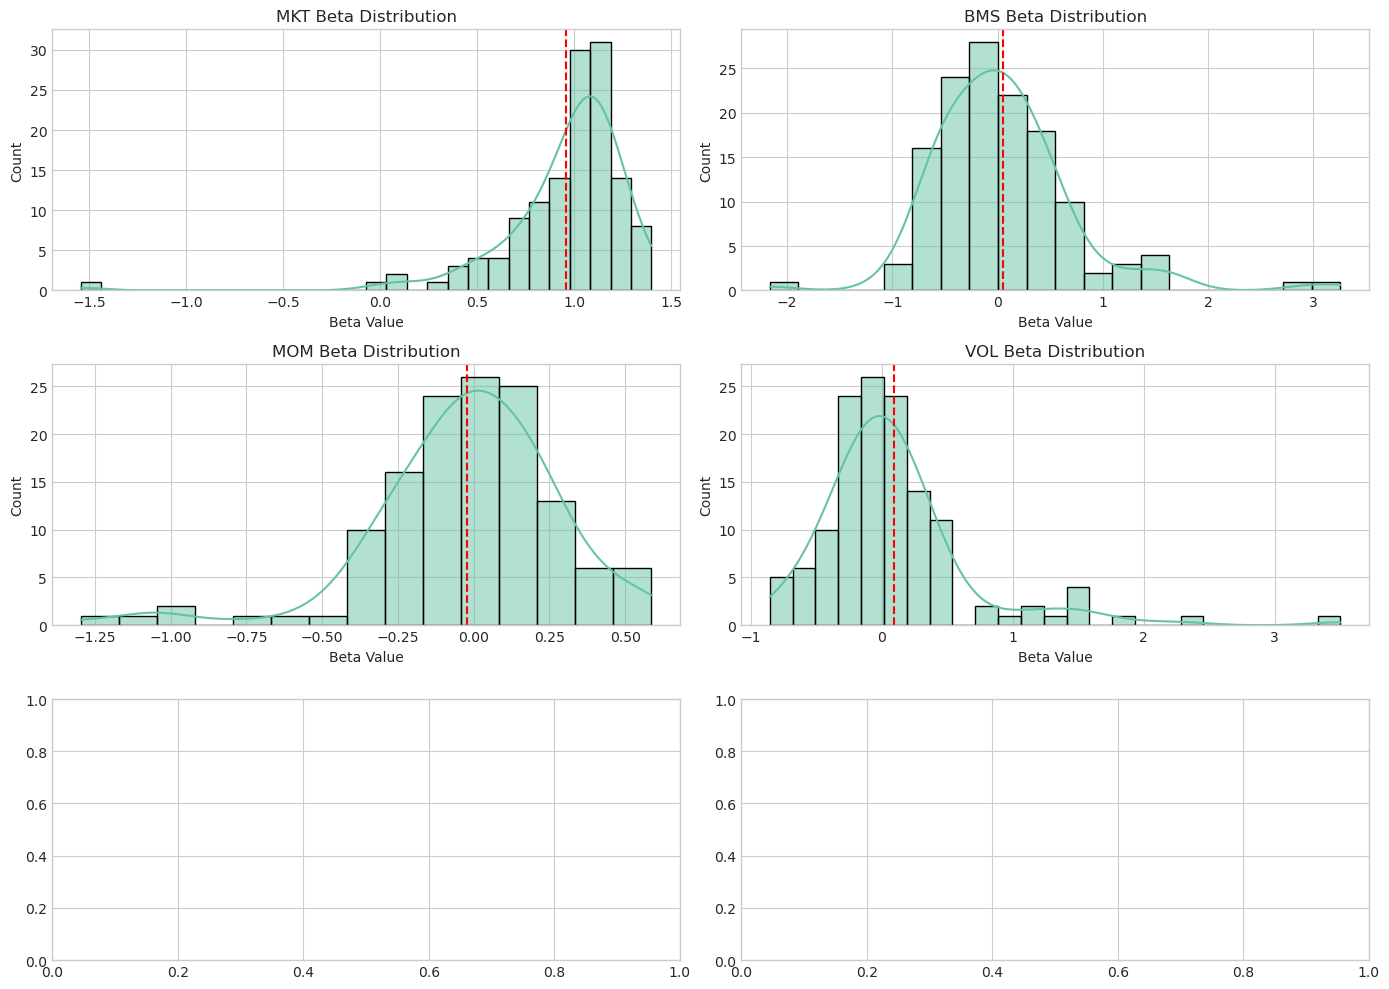

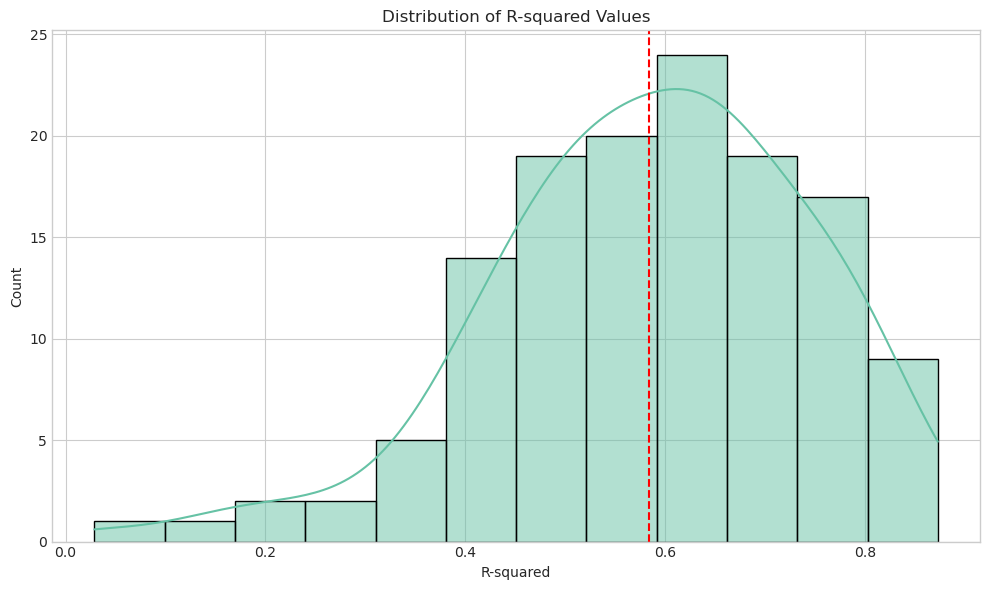

In [16]:
print("Analyzing regression results...")

# 整体平均因子暴露
avg_exposure = model_results[['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']].mean()
t_stats = model_results[['t_mkt', 't_smb', 't_mom', 't_vol']].mean()

exposure_stats = pd.DataFrame({
    'Average Beta': avg_exposure,
    'Average t-stat': t_stats
})

# 绘制因子暴露分布
fig, axes = plt.subplots(3, 2, figsize=(14, 10))
axes = axes.flatten()

for i, factor in enumerate(['beta_mkt', 'beta_smb', 'beta_mom', 'beta_vol']):
    sns.histplot(model_results[factor], kde=True, ax=axes[i])
    axes[i].set_title(f'{factor[5:].upper()} Beta Distribution')
    axes[i].set_xlabel('Beta Value')
    axes[i].axvline(model_results[factor].mean(), color='r', linestyle='--')

plt.tight_layout()
plt.savefig('beta_distribution.png', dpi=300)

# 绘制R²分布
plt.figure(figsize=(10, 6))
sns.histplot(model_results['r_squared'], kde=True)
plt.axvline(model_results['r_squared'].mean(), color='r', linestyle='--')
plt.title('Distribution of R-squared Values')
plt.xlabel('R-squared')
plt.tight_layout()
plt.savefig('rsquared_distribution.png', dpi=300)

In [33]:
alphas = model_results['alpha']
residual_vars = [1 - row['r_squared'] for _, row in model_results.iterrows()]  # 简化估计

# GRS统计量计算（简化版）
grs_stat = (alphas.mean() ** 2) / (np.array(residual_vars).mean() / len(alphas))
grs_stat * 100000

0.009005416936844054

Building investment portfolio...


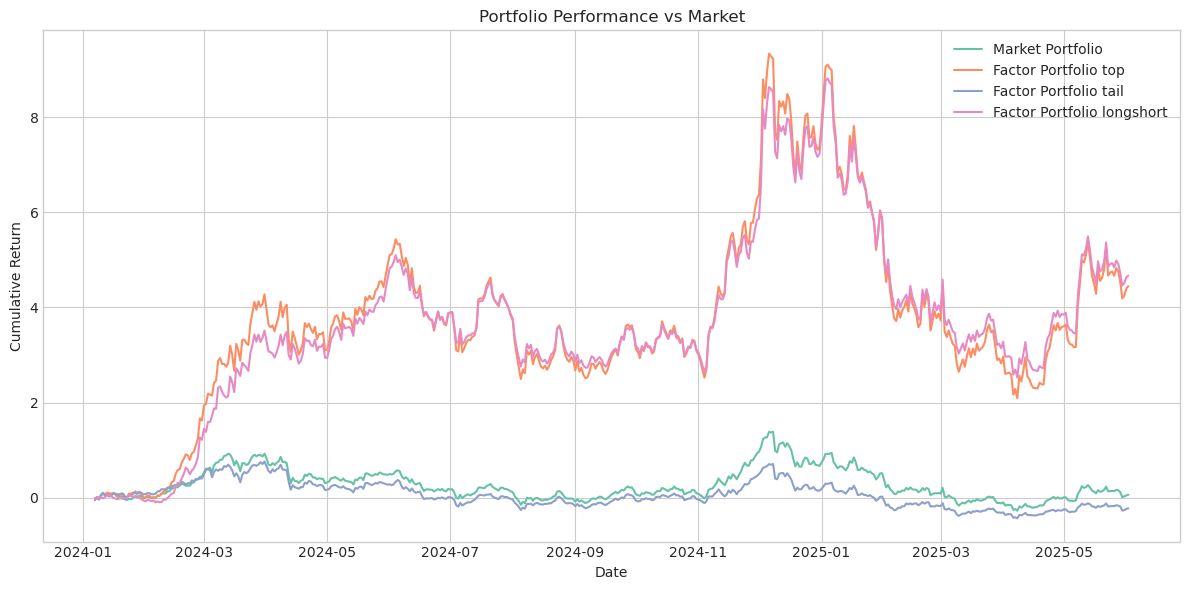